In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

#### Data Load

In [3]:
DATA_DIR = "../data/"
data = pd.read_pickle(DATA_DIR + 'base_dataset_numerical_minmax.pkl') #불러오기

In [51]:
DATA_DIR = "../data/"
data = pd.read_pickle(DATA_DIR + 'base_dataset_before_std.pkl') #불러오기

#### Standard Scaling

In [52]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=123, use_gpu=True, normalize=True)
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [53]:
best = s.compare_models()
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:03:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9010,0.9205,0.5707,0.7553,0.6494,0.5931,0.6014,0.0280
knn,K Neighbors Classifier,0.8979,0.8833,0.4943,0.7932,0.6085,0.5534,0.5742,0.0350
nb,Naive Bayes,0.8854,0.8712,0.6251,0.6498,0.6367,0.5688,0.5693,0.0170


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

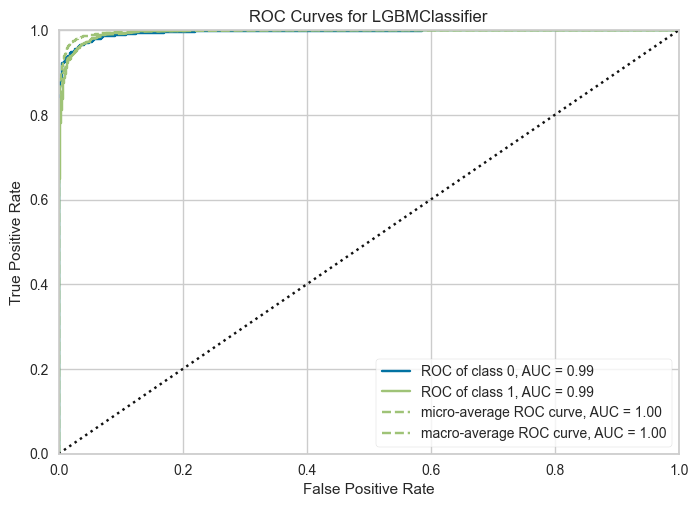

In [ ]:
s.plot_model(best, plot='auc')

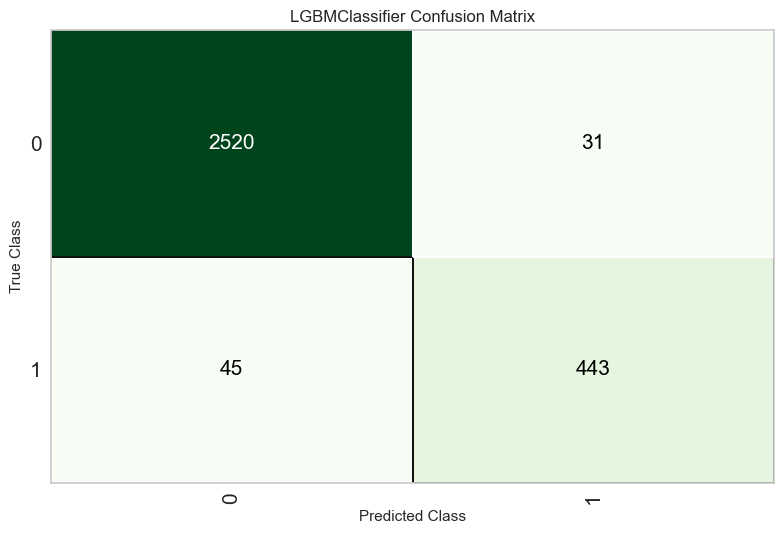

In [ ]:
s.plot_model(best, plot='confusion_matrix')
# test set에 대하여

In [ ]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9750,0.9950,0.9078,0.9346,0.9210,0.9061,0.9063


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
3676,49,3,1,2,1,36,5,3,3,1438.300049,...,73,0.825,0.000,False,True,False,False,0,0,0.9994
840,64,0,3,1,1,51,6,3,1,4920.000000,...,31,0.348,0.232,False,True,False,False,0,0,0.9991
7373,41,2,3,3,1,31,3,1,3,8228.000000,...,68,0.545,0.235,True,False,True,False,0,0,0.9997
3140,49,2,2,3,1,35,4,3,2,2532.000000,...,76,0.727,0.839,False,True,False,False,0,0,0.9999
6563,35,2,2,2,1,15,4,2,1,1438.300049,...,82,0.640,0.580,False,True,False,False,0,0,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,44,4,3,1,1,28,5,2,3,2020.000000,...,45,0.552,0.000,False,True,False,False,1,1,0.9978
3563,45,3,3,2,1,35,5,3,2,3538.000000,...,74,0.762,0.000,True,True,False,False,0,0,0.9993
1091,65,0,2,2,1,36,5,2,3,2163.000000,...,57,0.839,0.431,True,False,True,False,0,0,0.9921
8648,44,3,2,3,1,36,2,2,1,3605.000000,...,78,0.814,0.000,True,True,False,False,0,0,0.6428


In [ ]:
predictions = s.predict_model(best, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9923,0.9989,0.9723,0.9796,0.9759,0.9714,0.9714


#### minmax scaler

In [4]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=123, use_gpu=True)
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [ ]:
# s = ClassificationExperiment()
# s.setup(data, target=data.columns[-1], session_id=123, use_gpu=True,
#         normalize=True, normalize_method='minmax')
# s

In [5]:
# 사용자 정의 메트릭 함수를 정의합니다.
def predict_proba_metric(y_true, y_pred, **kwargs):
    # y_true는 실제 레이블, y_pred는 예측 확률입니다.
    # 원하는 사용자 정의 메트릭을 여기에 구현합니다.
    # 예를 들어, ROC AUC를 계산하는 경우:
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(y_true, y_pred)

# add_metric 함수를 사용하여 사용자 정의 메트릭을 추가하고, predict_proba를 대상으로 설정합니다.
s.add_metric(id='predict_proba_metric', name='predict_proba_metric', score_func=predict_proba_metric, target='pred_proba', greater_is_better=True)


Name                                              predict_proba_metric
Display Name                                      predict_proba_metric
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(predict_proba_metric, needs_proba=...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: predict_proba_metric, dtype: object

In [6]:
best = s.compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,predict_proba_metric,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9701,0.9926,0.8833,0.9277,0.9045,0.8868,0.8875,0.9926,0.4990
gbc,Gradient Boosting Classifier,0.9643,0.9881,0.8333,0.9380,0.8822,0.8612,0.8636,0.9881,1.1660
rf,Random Forest Classifier,0.9577,0.9873,0.7999,0.9277,0.8588,0.8341,0.8374,0.9873,0.1960
ada,Ada Boost Classifier,0.9540,0.9829,0.8131,0.8923,0.8502,0.8231,0.8248,0.9829,0.2750
et,Extra Trees Classifier,0.9372,0.9796,0.6603,0.9286,0.7710,0.7359,0.7507,0.9796,0.1580
dt,Decision Tree Classifier,0.9310,0.8652,0.7683,0.7963,0.7810,0.7402,0.7410,0.8652,0.0430
lr,Logistic Regression,0.9015,0.9164,0.5286,0.7909,0.6327,0.5785,0.5947,0.9164,0.0420
lda,Linear Discriminant Analysis,0.9000,0.9187,0.5891,0.7375,0.6542,0.5966,0.6022,0.9187,0.0230
ridge,Ridge Classifier,0.8956,0.0000,0.4416,0.8304,0.5756,0.5224,0.5569,0.0000,0.0130
svm,SVM - Linear Kernel,0.8952,0.0000,0.5962,0.7181,0.6457,0.5853,0.5922,0.0000,0.0190


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
# 최상의 모델의 하이퍼파라미터 튜닝
tuned_model = s.tune_model(best, optimize='Recall',
                           early_stopping=True,
                           choose_better=True
                           )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:05:19
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,predict_proba_metric
Fold,,,,,,,,
0,0.9676,0.9901,0.8596,0.9333,0.8950,0.8758,0.8769,0.9901
1,0.9718,0.9922,0.8684,0.9519,0.9083,0.8916,0.8929,0.9922
2,0.9661,0.9864,0.8596,0.9245,0.8909,0.8709,0.8717,0.9864
3,0.9676,0.9881,0.9123,0.8889,0.9004,0.8811,0.8812,0.9881
4,0.9718,0.9944,0.8947,0.9273,0.9107,0.8940,0.8942,0.9944
5,0.9676,0.9951,0.8421,0.9505,0.8930,0.8740,0.8762,0.9951
6,0.9718,0.9939,0.8772,0.9434,0.9091,0.8924,0.8932,0.9939
7,0.9549,0.9879,0.8596,0.8596,0.8596,0.8328,0.8328,0.9879
8,0.9788,0.9962,0.9292,0.9375,0.9333,0.9207,0.9208,0.9962


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 1025, number of negative: 5354
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1787
[LightGBM] [Info] Number of data points in the train set: 6379, number of used features: 20


In [9]:
tuned_model_hyperparameters = tuned_model.get_params()
tuned_model_hyperparameters

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'device': 'gpu'}

In [ ]:
# 튜닝된 모델을 export
s.save_model(tuned_model, DATA_DIR + 'tuned_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Customer_Age', 'Dependent_count',
                                              'Education_Level',
                                              'Income_Category', 'Card_Category',
                                              'Months_on_book',
                                              'Total_Relationship_Count',
                                              'Months_Inactive_12_mon',
                                              'Contacts_Count_12_mon',
                                              'Credit_Limit',
                                              'Total_Revolving_Bal',
                                              'Total_Amt_Chng_Q4_Q1',
                                              'Tota...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                               

In [ ]:
# 저장된 모델을 로드
loaded_model = load_model('../data/tuned_model')

Transformation Pipeline and Model Successfully Loaded


In [10]:
s.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

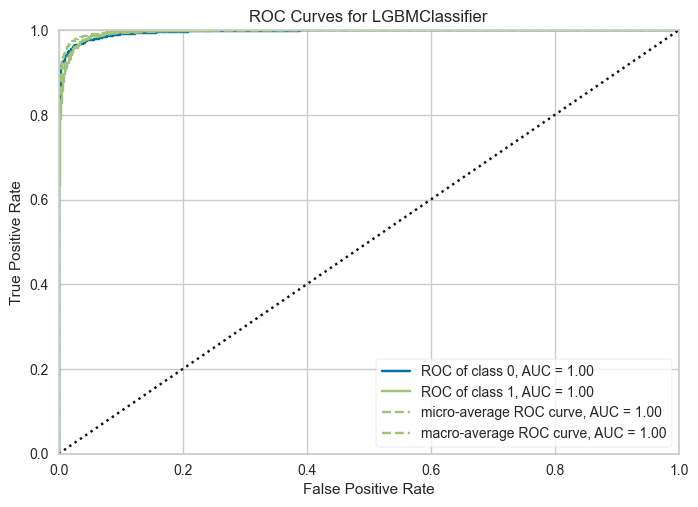

In [11]:
s.plot_model(tuned_model, plot='auc')

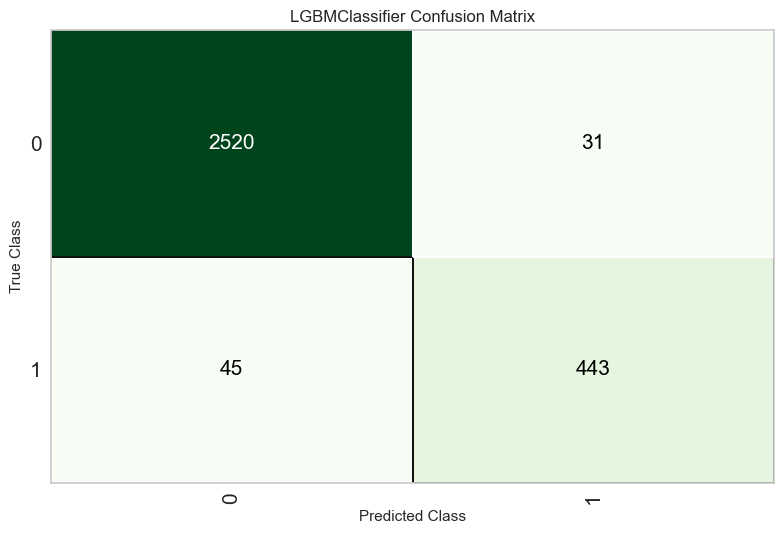

In [12]:
s.plot_model(tuned_model, plot='confusion_matrix')
# test set에 대하여

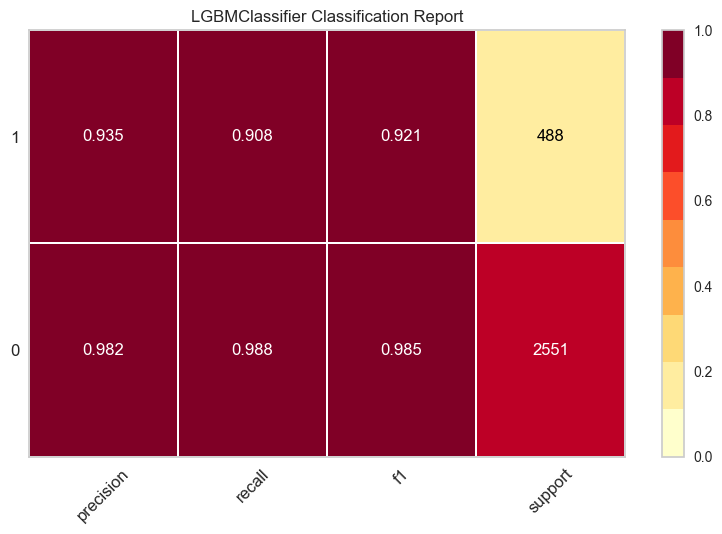

In [13]:
s.plot_model(tuned_model, plot='class_report')

In [14]:
s.predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,predict_proba_metric
0,Light Gradient Boosting Machine,0.9750,0.9955,0.9078,0.9346,0.9210,0.9061,0.9063,0.9955


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
3676,0.489362,0.6,0.0,0.25,0.0,0.534884,0.8,0.500000,0.500000,0.000000,...,0.488372,0.222132,0.000000,0,1,0,0,0,0,0.9996
840,0.808511,0.0,0.4,0.00,0.0,0.883721,1.0,0.500000,0.166667,0.105258,...,0.162791,0.093700,0.232232,0,1,0,0,0,0,0.9991
7373,0.319149,0.4,0.4,0.50,0.0,0.418605,0.4,0.166667,0.500000,0.205265,...,0.449612,0.146742,0.235235,1,0,1,0,0,0,0.9996
3140,0.489362,0.4,0.2,0.50,0.0,0.511628,0.6,0.500000,0.333333,0.033065,...,0.511628,0.195746,0.839840,0,1,0,0,0,0,0.9998
6563,0.191489,0.4,0.2,0.25,0.0,0.046512,0.6,0.333333,0.166667,0.000000,...,0.558140,0.172321,0.580581,0,1,0,0,0,0,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,0.382979,0.8,0.4,0.00,0.0,0.348837,0.8,0.333333,0.500000,0.017586,...,0.271318,0.148627,0.000000,0,1,0,0,1,1,0.9962
3563,0.404255,0.6,0.4,0.25,0.0,0.511628,0.8,0.500000,0.333333,0.063478,...,0.496124,0.205170,0.000000,1,1,0,0,0,0,0.9993
1091,0.829787,0.0,0.2,0.25,0.0,0.534884,0.8,0.333333,0.500000,0.021909,...,0.364341,0.225902,0.431431,1,0,1,0,0,0,0.9876
8648,0.382979,0.6,0.2,0.50,0.0,0.534884,0.2,0.333333,0.166667,0.065503,...,0.527132,0.219171,0.000000,1,1,0,0,0,0,0.6415


In [22]:
predictions = s.predict_model(tuned_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,predict_proba_metric
0,Light Gradient Boosting Machine,0.9924,0.9991,0.9723,0.9802,0.9762,0.9717,0.9717,0.9991


#### robust scaling

In [ ]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=125, use_gpu=True, normalize=True, normalize_method='robust')
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

,Description,Value
0,Session id,125
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

In [ ]:
best = s.compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9701,0.9928,0.8832,0.9284,0.9047,0.8870,0.8878,0.4530
gbc,Gradient Boosting Classifier,0.9656,0.9902,0.8481,0.9320,0.8877,0.8674,0.8690,1.3550
rf,Random Forest Classifier,0.9592,0.9878,0.8147,0.9236,0.8653,0.8414,0.8440,0.2390
ada,Ada Boost Classifier,0.9561,0.9851,0.8428,0.8798,0.8607,0.8347,0.8351,0.3310
et,Extra Trees Classifier,0.9379,0.9797,0.6699,0.9234,0.7760,0.7411,0.7542,0.1780
dt,Decision Tree Classifier,0.9367,0.8796,0.7954,0.8086,0.8014,0.7638,0.7642,0.0590
lda,Linear Discriminant Analysis,0.9035,0.9235,0.6102,0.7456,0.6702,0.6144,0.6192,0.0350
lr,Logistic Regression,0.9034,0.9255,0.5804,0.7635,0.6586,0.6036,0.6118,0.0410
knn,K Neighbors Classifier,0.9027,0.8923,0.5294,0.7981,0.6361,0.5825,0.5992,0.0460
ridge,Ridge Classifier,0.8979,0.0000,0.4513,0.8393,0.5859,0.5338,0.5678,0.0270


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=125, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

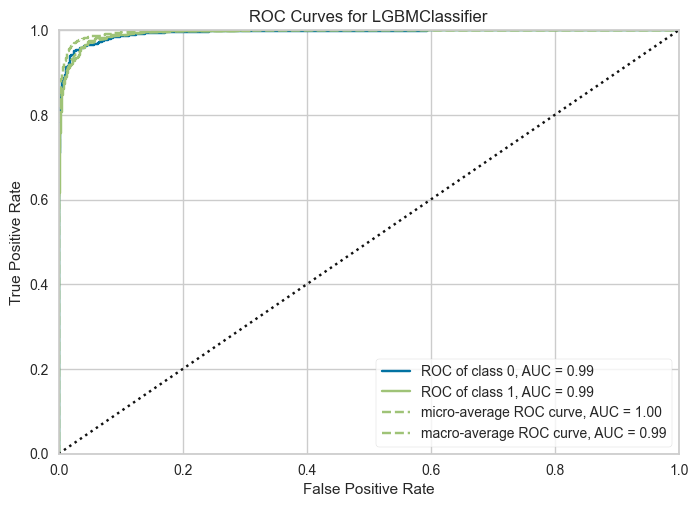

In [ ]:
s.plot_model(best, plot='auc')

In [ ]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9717,0.9935,0.8730,0.9467,0.9083,0.8916,0.8926


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
9411,40,2,4,2,3,31,1,2,1,3735.000000,...,130,0.757,0.395,True,True,False,False,0,0,0.9999
5561,47,3,4,3,1,36,5,1,3,4284.000000,...,85,0.848,0.444,True,True,False,False,0,0,0.9998
4666,40,2,5,2,1,25,2,2,4,3795.000000,...,32,0.778,0.663,False,True,False,False,1,1,0.8388
6379,60,0,2,2,1,36,6,3,2,4115.000000,...,61,1.179,0.299,False,False,True,False,0,0,0.9998
5581,52,2,2,1,1,41,4,2,2,5616.000000,...,62,0.590,0.429,False,True,False,False,0,0,0.9872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,40,4,2,3,1,36,6,3,3,5797.000000,...,33,0.571,0.307,True,True,False,False,0,0,0.8618
5262,33,3,3,1,1,20,5,1,3,1438.300049,...,72,0.636,0.000,False,True,False,False,0,0,0.9995
8821,45,4,4,1,1,36,2,1,1,2737.000000,...,80,0.569,0.000,False,True,False,False,0,0,0.9957
4987,44,5,3,3,1,36,4,2,3,5791.000000,...,67,0.861,0.000,False,True,False,False,0,0,0.9992


In [ ]:
predictions = s.predict_model(best, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9914,0.9985,0.9619,0.9843,0.9730,0.9679,0.9679


In [ ]:
# Scaler 별 비교

'''
 	                             Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
std 	Light Gradient Boosting Machine	0.9923	0.9989	0.9723	0.9796	0.9759	0.9714	0.9714	
minmax	Light Gradient Boosting Machine	0.9924	0.9991	0.9723	0.9802	0.9762	0.9717	0.9717
robust	Light Gradient Boosting Machine	0.9914	0.9985	0.9619	0.9843	0.9730	0.9679	0.9679
'''

'\n \t                             Model\tAccuracy\tAUC\tRecall\tPrec.\tF1\tKappa\tMCC\nstd \tLight Gradient Boosting Machine\t0.9923\t0.9989\t0.9723\t0.9796\t0.9759\t0.9714\t0.9714\t\nminmax\tLight Gradient Boosting Machine\t0.9924\t0.9991\t0.9723\t0.9802\t0.9762\t0.9717\t0.9717\nrobust\tLight Gradient Boosting Machine\t0.9914\t0.9985\t0.9619\t0.9843\t0.9730\t0.9679\t0.9679\n'

In [ ]:
# 각 데이터 포인트의 클래스 확률을 확인합니다.
# 'Score' 열은 예측된 클래스 1(Positive)의 확률을 나타냅니다.
probability_column_name = 'prediction_score'
predictions[probability_column_name].describe()

count    10127.000000
mean         0.985654
std          0.046762
min          0.504600
25%          0.995200
50%          0.999300
75%          0.999800
max          1.000000
Name: prediction_score, dtype: float64